In [1]:
import numpy as np
import scipy as sp
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

# helper functions:
def make_cosine(a, k, ph, N) :
    n = np.arange(N)
    return a * np.cos( 2 * np.pi * k / N * n + ph)

def testConvolution():
    #test1 delta with a delta
    signal1 = [1]
    signal2 = [1]
    if(convolution(signal1,signal2)==None):
        pass
    elif(convolution(signal1,signal2)[0]==1):
        print("Test 1 Passed")
    else:
        print("Test 1 Failed")
    #delta with complicated signal
    signal1 = [1,2]
    signal2 = [1]
    if(convolution(signal1,signal2)==None):
        pass
    elif(convolution(signal1,signal2)[0]==1 and convolution(signal1,signal2)[1]==2):
        print("Test 2 Passed")
    else:
        print("Test 2 Failed")
    #two complicated signals together
    signal1 = [1,2,3]
    signal2 = [3,4]
    convolved = np.convolve(signal1,signal2)
    tooCompare = convolution(signal1,signal2)
    if(tooCompare==None):
        pass
    elif(convolved[0:4]==tooCompare[0:4]):
        print("Test 3 Passed")
    else:
        print("Test 3 Failed")

# Convolution

From section 1 we know that a delta input gives an impulse response. Any discrete signal is the sum of deltas:
$$ x[n] = \sum_{i=-\infty}^{\infty} x[i] \delta[n-i]$$

If our system is LTI we can consider the individual deltas and find their impulse response and then sum those. 
Let us look at an example with input $$x[n]=[1,3,-1]$$ and system $$y[n] = x[n] + 2 x[n-1]$$.

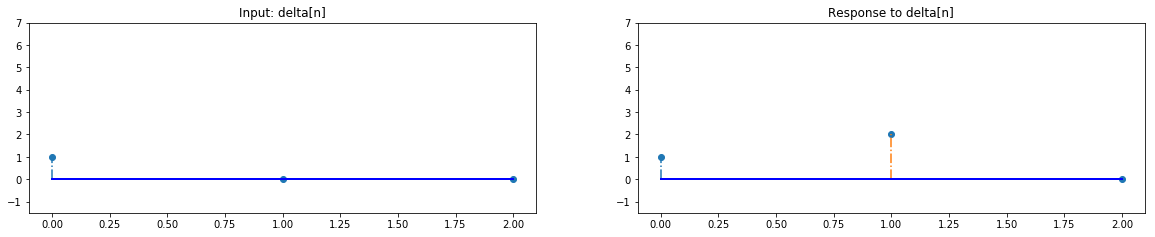

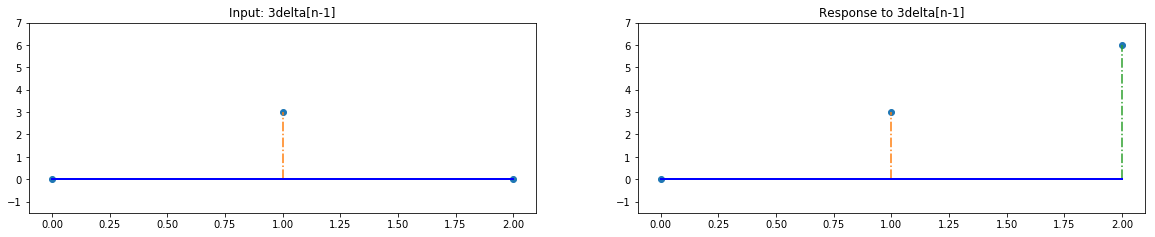

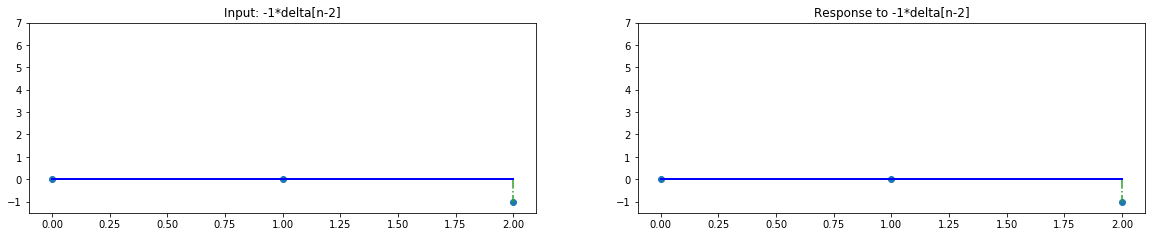

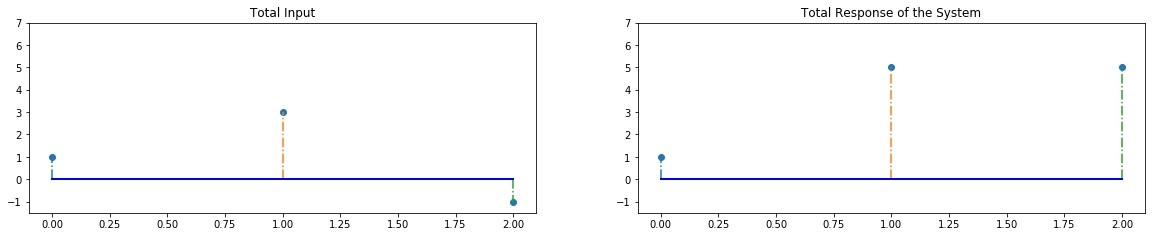

In [12]:
def convolutionDemo():
    xs = [1,2,0]
    ys = [1,0,0]
    sys = sp.signal.TransferFunction(xs, ys,dt=1.0)
    responsetime1 , response1 = sp.signal.dlsim(sys,[1,0,0])
    plt.figure(figsize=(20,3.5))
    plt.subplot(1,2,1)
    markerline, stemlines, baseline = plt.stem([0,1,2],[1,0,0],'-.')
    plt.setp(baseline,'color','b','linewidth',2)
    plt.ylim([-1.5,7])
    plt.title("Input: delta[n]")
    plt.subplot(1,2,2)
    markerline, stemlines, baseline = plt.stem(responsetime1,response1,'-.')
    plt.setp(baseline, 'color', 'b', 'linewidth', 2)
    plt.ylim([-1.5,7])
    plt.title("Response to delta[n]")
    plt.show()
    
    responsetime2 , response2 = sp.signal.dlsim(sys,[0,3,0])
    plt.figure(figsize=(20,3.5))
    plt.subplot(1,2,1)
    markerline, stemlines, baseline = plt.stem([0,1,2],[0,3,0],'-.')
    plt.setp(baseline,'color','b','linewidth',2)
    plt.ylim([-1.5,7])
    plt.title("Input: 3delta[n-1]")
    plt.subplot(1,2,2)
    markerline, stemlines, baseline = plt.stem(responsetime2,response2,'-.')
    plt.setp(baseline, 'color', 'b', 'linewidth', 2)
    plt.title("Response to 3delta[n-1]")
    plt.ylim([-1.5,7])
    
    plt.show()
    
    responsetime3 , response3 = sp.signal.dlsim(sys,[0,0,-1])
    plt.figure(figsize=(20,3.5))
    plt.subplot(1,2,1)
    markerline, stemlines, baseline = plt.stem([0,1,2],[0,0,-1],'-.')
    plt.setp(baseline,'color','b','linewidth',2)
    plt.ylim([-1.5,7])
    plt.title("Input: -1*delta[n-2]")
    plt.subplot(1,2,2)
    markerline, stemlines, baseline = plt.stem(responsetime3,response3,'-.')
    plt.setp(baseline, 'color', 'b', 'linewidth', 2)
    plt.title("Response to -1*delta[n-2]")
    plt.ylim([-1.5,7])
    plt.show()
    
    totalresponsetime , totalresponse = sp.signal.dlsim(sys,[1,3,-1])
    plt.figure(figsize=(20,3.5))
    plt.subplot(1,2,1)
    markerline, stemlines, baseline = plt.stem([0,1,2],[1,3,-1],'-.')
    plt.setp(baseline,'color','b','linewidth',2)
    plt.ylim([-1.5,7])
    plt.title("Total Input")
    plt.subplot(1,2,2)
    markerline, stemlines, baseline = plt.stem(totalresponsetime,totalresponse,'-.')
    plt.setp(baseline, 'color', 'b', 'linewidth', 2)
    plt.title("Total Response of the System")
    plt.ylim([-1.5,7])
    plt.show()
    
convolutionDemo()

So the output of a system is just some shifted and linearly scaled version of the impulse response! (NOTE! This is only true if the system is LTI).
We shall formalize this by writing the equation for what is going on here:
$$ y[n] = \sum_{k=\infty}^{\infty} h[k]x[n-k]$$
We are going to call this operator convolution. We write convolution as so:
$$ x[n]*h[n] = \sum_{k=\infty}^{\infty} h[k]x[n-k] = y[n]$$

## Homework Exercise
Code up a version of convolution here: (the below diagrams should really help you understand what you need to code).

In [3]:
def convolution(signal1,signal2):
    pass
    
testConvolution()

Here is another diagram that will assist you in understanding :)
![convolution part 1](Photos/conv1.png)
![convolution part 2](Photos/conv2.png)
![convolution part 3](Photos/conv3.png)
![convolution part 4](Photos/conv4.png)
![convolution part 5](Photos/conv5.png)

In addition, this video will help you on your quest of understanding: 
https://www.youtube.com/watch?v=O9-HN-yzsFQ&feature=youtu.be

We now see why LTI systems are very well behaved. Linearity and time invarience allows us to extrapolate all of the information about a system from only the impulse response (or step response).

## Correlation

We define correlation as the similarity between two signals. In statistics we say that two things are correlated if the data from one things strongly depends on the data from the other thing.
Let's first do a demo to get an idea about how correlation works for signals.

In [4]:
def correlationDemo(shift):
    xs = [0,0,0,0,0,0,1,2,3,0,0,0,0,0,0]
    plt.figure()
    plt.plot(xs)
    plt.plot(np.roll(xs,shift))
    plt.show()
    print("Similarity:",np.correlate(xs,np.roll(xs,shift))[0])
interact(correlationDemo, shift=(-6,6));

interactive(children=(IntSlider(value=0, description='shift', max=6, min=-6), Output()), _dom_classes=('widget-interact',))

So when the two signals are most similar we return the highest number, awesome!
We are going to represent correlation using the following equation
$$\text{correlation} = \sum_{i=-\infty}^{\infty}x[i]y[i]$$

Now, often times in signal processing we don't just want one number for the correlation of two signals, we want a list of numbers that represents how correlated two signals are as we shift one relative to the other.
We call this method of correlation cross-correlation and will give it the notion $CC[n]$. Note that $CC[0]$ just represents the correlation of two signals.
## Homework Exercise
Now, implement the cross correlation of two signals in the below function. Use zero-padding (assume values that you don't know are zero). Note that my example above will help you.

In [5]:
def crossCorrelation(signal1,signal2):
    pass
crossCorrelation(signal1=[0,0,0,1,2,3,0,0,0],signal2=[0,0,0,1,2,3,0,0,0])

Consider the cross-correlation of a sine wave with itself:

In [6]:
def sinusoid_dot_proudct(k1=2, k2=3) :
    N = 100
    x1 = make_cosine(1, k1, 0, N)
    x2 = make_cosine(1, k2, 0, N)
    x1x2 = x1 * x2 #elementwise product
    dp = np.sum(x1x2)
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(x1)
    plt.plot(x2)
    plt.subplot(2,1,2)
    plt.plot(x1x2, 'r')
    plt.ylim(-1,1)
    plt.ylabel('$x_1 \cdot x_2$')
    plt.text(70, 0.7, '< x1 , x2 > = %.2f' % dp, size=15)
    plt.show()
interact(sinusoid_dot_proudct,k1=(1, 10), k2 = (1,10));

interactive(children=(IntSlider(value=2, description='k1', max=10, min=1), IntSlider(value=3, description='k2', max=10, min=1), Output()), _dom_classes=('widget-interact',))

So sinewavess of the same frequency correlate to a non-zero value, but sinewaves of different frequencies don't have that property.
I am going to be rigorous and prove that in continuous time right now:
$$ \int_{-\pi}^{\pi} \sin(k_{1}x)\sin(k_{2}x) dx = \frac{1}{2} \int_{-\pi}^{\pi} \cos((k_{1}-k_{2})x)-\cos((k_{1}+k_{2})x) dx = \frac{1}{2} \frac{\sin((k_{1}-k_{2})x)}{k_{1}-k_{2}} \Bigg |_{-\pi}^{\pi} - \frac{1}{2} \frac{\sin((k_{1}+k_{2})x)}{k_{1}+k_{2}} \Bigg |_{-\pi}^{\pi} = 0 \text{ if } k_{1} \neq k_{2}$$

Huh! So if we convolve (read as correlate) a sine wave with another sine wave we get a value telling us if they match in frequency. So we can now build a frequency detector :D
Code one up below! Make use of make_cosine.
Your output should look like this:
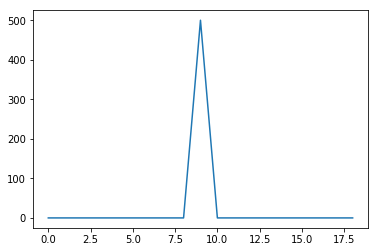

In [13]:
def frequencyDetector(signal1,freqrangemin,freqrangemax):
    pass
    
cos = make_cosine(a=1.0,k=10,N=1000,ph=0)
frequencyDetector(cos,1,20)

A frequency detector. Now, how would one do this in continuous time? In continuous time we are going to preresent a generic sinusoid using a complex exponential $$\cos(x) + j \sin(x) = e^{j x}$$. We will discuss later why we have a real and imaginary part.
So, in continuous time our frequency detector is going to look like this:
$$ X(\omega) = \int_{-\infty}^{\infty}x(t)e^{-j \omega t} dt$$
So, with this in mind can you create a formula that does this same operation with discrete signals? 
## Homework Exercise

Create a discrete frequency detector. You can use a cosine instead of $e^{j \omega t}$ 
I am not looking for insane precision, just something that shows you understand the general idea.

In [8]:
def discreteFrequencyDetector(signal):
    pass
signal = make_cosine(a=2.,k=5,N=1000,ph=0) + make_cosine(a=1.,k=10,N=1000,ph=0) + make_cosine(a = 3., k = 7, N =1000, ph = 0)
discreteFrequencyDetector(signal=signal)

The tool you created above is actually what is called the "Fourier Transform" which just takes some time domain signal and shows us its frequency content.
Why don't we have a look at the fourier transform of some very common signals

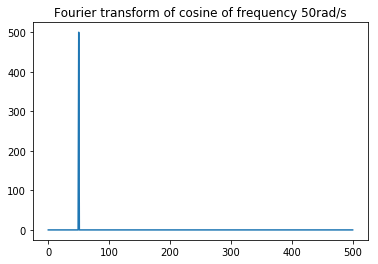

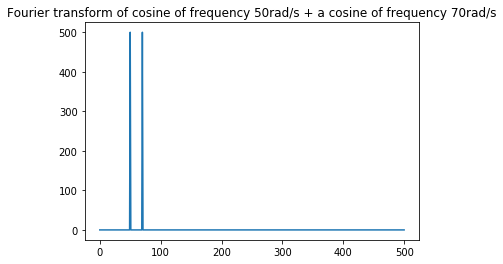

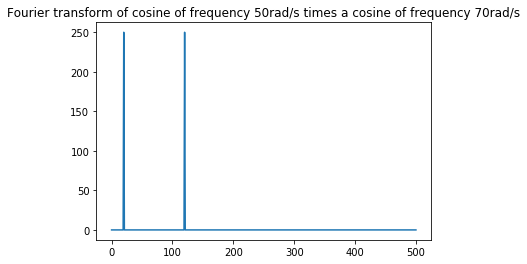

In [9]:
cosed = make_cosine(a=1.0,k=50,N=1000,ph=0)
plt.figure()
plt.plot(np.fft.rfft(cosed));
plt.title("Fourier transform of cosine of frequency 50rad/s")
plt.show()

cosed2 = make_cosine(a=1.0,k=70,N=1000,ph=0)
plt.figure()
plt.plot(np.fft.rfft(cosed+cosed2));
plt.title("Fourier transform of cosine of frequency 50rad/s + a cosine of frequency 70rad/s")
plt.show()

plt.figure()
plt.plot(np.fft.rfft(cosed*cosed2));
plt.title("Fourier transform of cosine of frequency 50rad/s times a cosine of frequency 70rad/s")
plt.show()


OHHHHH, that last picture is REALLY REALLY interesting. When we multiply the cosines together it seems to make two frequency spikes of 20rad/s and 120rad/s respectively. 
## Homework Exercise
Why does this occur? Think about trigonometry and the product of two cosines
$$\text{Write why this occurs here}$$.

We are going to think of applications of this weird phenomena.
For example, suppose we have an audio signal and we want to shift it up to a different center frequency, how can we do that? I have a toy example below:

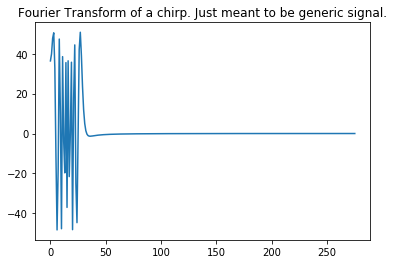

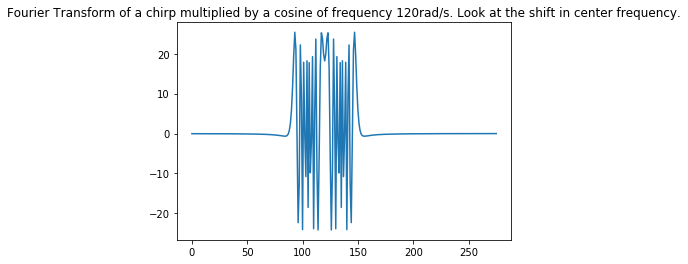

In [10]:
#starttime = 
chirp = sp.signal.chirp(np.linspace(0,10,550), f0=0, f1=3, t1=10, method='linear')
plt.figure()
plt.plot(np.fft.rfft(chirp))
plt.title("Fourier Transform of a chirp. Just meant to be generic signal.")
plt.show()

cosmod = make_cosine(a=1.0,k=120,N=len(chirp),ph=0)
plt.figure()
plt.plot(np.fft.rfft(chirp*cosmod))
plt.title("Fourier Transform of a chirp multiplied by a cosine of frequency 120rad/s. Look at the shift in center frequency.")
plt.show()

Note, that chirp's frequency is symmetry, so that is why it looks like two copies of the chirp occur when it was shifted by 120rad/s

We call this process of shifting content from one frequency range to another heterodyning.
It is recommended you read this wikipedia page: https://en.wikipedia.org/wiki/Heterodyne

## Homework Exercise

What is a HUGE application of this theory? How is used everyday?
$$\text{ HUGE application of the heterodyne principle} $$

## Homework Exercise

Suppose I am given a heterodyned signal (the second signal from above). How do I recover the original received signal?
$$\text{ Method of recovery}$$

We are going to go into this frequency stuff in substantially more detail next time.